# Code Writers Introduction

This project was developed by **AmirMohammad Farman** (Student Number: 2050804) and **Ali Tavakoli Yaraki** (Student Number: 2040500).

## University

We are students at University of Padua, studying ICT. The project was completed as part of Human Data Analytics under the guidance of Professor Michelle Rossi.


# **Setup**

In [ ]:
# Mounting Google Drive in Google Colab
from google.colab import drive
drive.mount('/content/drive')

In [2]:
# Install keras-tuner and tensorflow_hub packages
!pip install keras-tuner tensorflow_hub -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 16.2 MB/s eta 0:00:00


In [3]:
# Importing libraries for model architecture and optimization
from keras.models import Sequential
from keras.optimizers import Adam

# Importing TensorFlow Hub for transfer learning
import tensorflow_hub as hub

# Importing Keras Tuner for hyperparameter tuning
import keras_tuner as kt

# Importing libraries for data manipulation and analysis
import numpy as np
import pandas as pd

# Importing TensorFlow and Keras layers for machine learning and deep learning
import tensorflow as tf
from keras.layers import GlobalMaxPooling2D, GlobalAveragePooling2D, Dense, Flatten, Dropout
from keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras import Sequential
from keras.metrics import mean_absolute_error
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.xception import preprocess_input, Xception
from keras.applications import MobileNet, InceptionV3

# Importing libraries for date and time manipulation
import datetime

# Importing libraries for file and directory operations
import os

# Importing libraries for mathematical operations
import math

# Importing libraries for data visualization
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg

# Importing library for machine learning model evaluation
from sklearn.model_selection import train_test_split


In [4]:
# Set GPU memory growth
gpus = tf.config.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)


# **EDA**

In [5]:
# Read CSV files

# Read the training CSV file into a DataFrame
train_df = pd.read_csv('/content/drive/MyDrive/boneage Project/Bone Age Training Set/train.csv')

# Read the testing CSV file into a DataFrame
test_df = pd.read_csv('/content/drive/MyDrive/boneage Project/Bone Age Test Set/Bone age ground truth.csv')


In [6]:
# Appending file extension to 'id' column for both training and testing dataframes

# For the training dataframe
train_df['id'] = train_df['id'].apply(lambda x: str(x) + '.png')

# For the testing dataframe
test_df['Case ID'] = test_df['Case ID'].apply(lambda x: str(x) + '.png')

In [7]:
# Show 5 top row of train DataFrame
train_df.head()

id  boneage   male
0  1377.png      180  False
1  1378.png       12  False
2  1379.png       94  False
3  1380.png      120   True
4  1381.png       82  False

In [8]:
# Show 5 top row of test DataFrame
test_df.head()

Case ID Sex  Ground truth bone age (months)
0  4360.png   M                          168.93
1  4361.png   M                          169.65
2  4362.png   M                           73.26
3  4363.png   M                          152.86
4  4364.png   M                          135.46

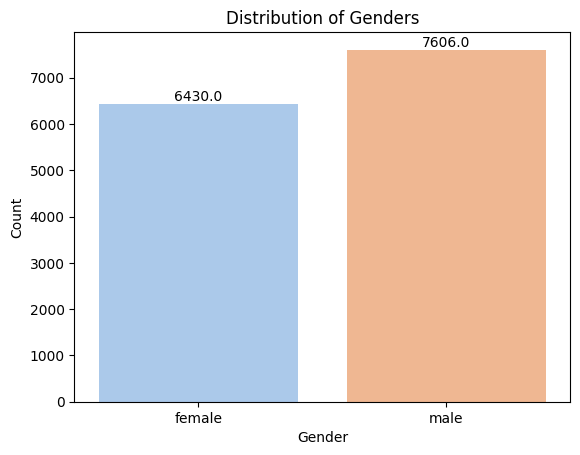

In [9]:
# Creating a new column called gender to keep the gender of the child as a string
train_df['gender'] = train_df['male'].apply(lambda x: 'male' if x else 'female')

# Plotting a countplot to visualize the distribution of genders
g = sns.countplot(x=train_df['gender'], palette='pastel')

# Add labels with the count of each category
for p in g.patches:
    g.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Set the plot title and axis labels
plt.title('Distribution of Genders')
plt.xlabel('Gender')
plt.ylabel('Count')

# Show the plot
plt.show()

In [10]:
# Create a list to store the rows
rows = []

# Oldest child in the dataset
max_age = train_df['boneage'].max()
rows.append({'Statistic': 'MAX age', 'Value': f'{max_age} months'})

# Youngest child in the dataset
min_age = train_df['boneage'].min()
rows.append({'Statistic': 'MIN age', 'Value': f'{min_age} months'})

# Mean age
mean_bone_age = train_df['boneage'].mean()
rows.append({'Statistic': 'Mean age', 'Value': f'{mean_bone_age}'})

# Median bone age
median_age = train_df['boneage'].median()
rows.append({'Statistic': 'Median age', 'Value': f'{median_age}'})

# Standard deviation of bone age
std_bone_age = train_df['boneage'].std()
rows.append({'Statistic': 'Standard Deviation', 'Value': f'{std_bone_age}'})

# Create the result DataFrame by concatenating the rows
result_df = pd.concat([pd.DataFrame(row, index=[0]) for row in rows], ignore_index=True)

# Calculate the z scores for the bone ages in the training DataFrame
train_df['bone_age_z'] = (train_df['boneage'] - mean_bone_age) / std_bone_age

# Show the result DataFrame
result_df.head()

Statistic               Value
0             MAX age          228 months
1             MIN age            1 months
2            Mean age  127.30407523510972
3          Median age               132.0
4  Standard Deviation   41.23569606097143

In [11]:
# Display the updated DataFrame
train_df.head()

id  boneage   male  gender  bone_age_z
0  1377.png      180  False  female    1.277920
1  1378.png       12  False  female   -2.796220
2  1379.png       94  False  female   -0.807652
3  1380.png      120   True    male   -0.177130
4  1381.png       82  False  female   -1.098662

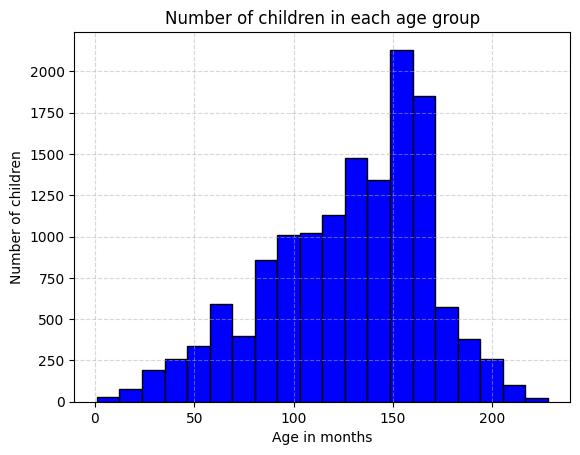

In [12]:
# Plotting a histogram for bone ages

# Plot a histogram of bone ages
plt.hist(train_df['boneage'], bins=20, color='blue', edgecolor='black')

# Set x-axis and y-axis labels
plt.xlabel('Age in months')
plt.ylabel('Number of children')

# Set the title of the plot
plt.title('Number of children in each age group')

# Add gridlines to the plot
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()

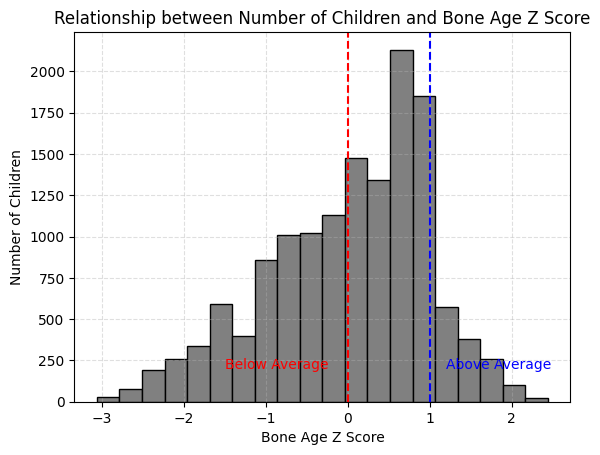

In [13]:
# Relationship between the number of children and bone age z score

# Plot a histogram of bone age z scores
plt.hist(train_df['bone_age_z'], bins=20, color='gray', edgecolor='black')

# Set x-axis and y-axis labels
plt.xlabel('Bone Age Z Score')
plt.ylabel('Number of Children')

# Set the title of the plot
plt.title('Relationship between Number of Children and Bone Age Z Score')

# Add gridlines to the plot
plt.grid(True, linestyle='--', alpha=0.4)

# Add vertical lines for reference
plt.axvline(0, color='red', linestyle='--', linewidth=1.5)
plt.axvline(1, color='blue', linestyle='--', linewidth=1.5)

# Add text labels for the vertical lines
plt.text(-1.5, 200, 'Below Average', color='red')
plt.text(1.2, 200, 'Above Average', color='blue')

# Show the plot
plt.show()

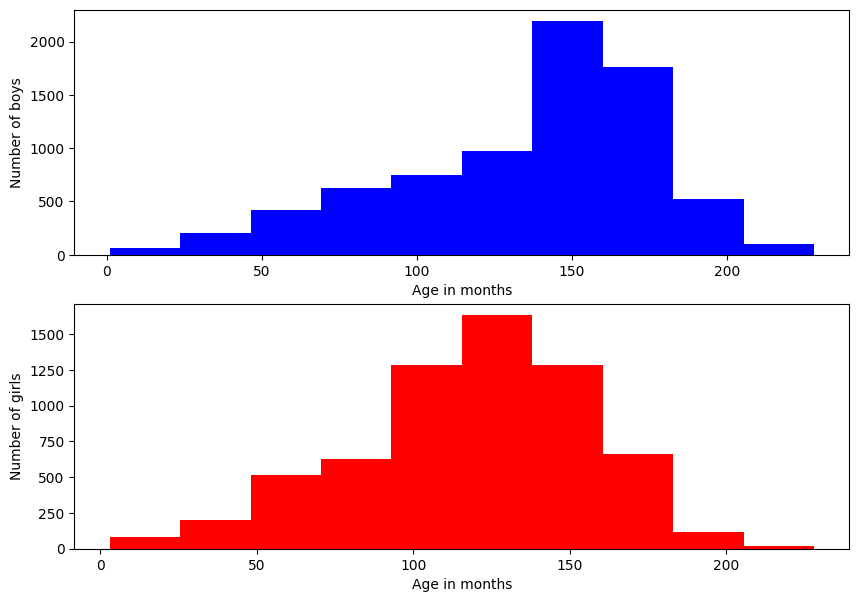

In [14]:
# Distribution of age within each gender

# Filter the train_df DataFrame to separate male and female samples
male = train_df[train_df['gender'] == 'male']
female = train_df[train_df['gender'] == 'female']

# Create a figure with two subplots
fig, ax = plt.subplots(2, 1)

# Plot a histogram of bone age distribution for males
ax[0].hist(male['boneage'], color='blue')
ax[0].set_xlabel('Age in months')
ax[0].set_ylabel('Number of boys')

# Plot a histogram of bone age distribution for females
ax[1].hist(female['boneage'], color='red')
ax[1].set_xlabel('Age in months')
ax[1].set_ylabel('Number of girls')

# Set the figure size
fig.set_size_inches((10, 7))

# Display the figure with the histograms
plt.show()

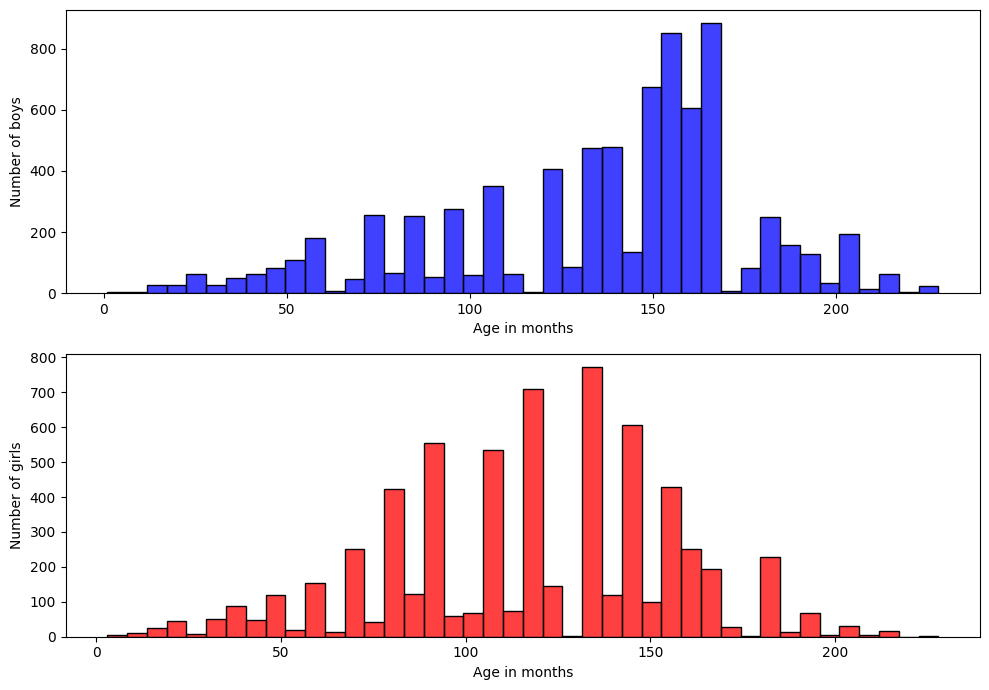

In [15]:
# Distribution of age within each gender

# Filter the train_df DataFrame to separate male and female samples
male = train_df[train_df['gender'] == 'male']
female = train_df[train_df['gender'] == 'female']

# Create a figure with two subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 7))

# Plot a histogram of bone age distribution for males
sns.histplot(data=male, x='boneage', color='blue', edgecolor='black', ax=ax[0])
ax[0].set_xlabel('Age in months')
ax[0].set_ylabel('Number of boys')

# Plot a histogram of bone age distribution for females
sns.histplot(data=female, x='boneage', color='red', edgecolor='black', ax=ax[1])
ax[1].set_xlabel('Age in months')
ax[1].set_ylabel('Number of girls')

# Adjust the layout of subplots to prevent overlap
fig.tight_layout()

# Display the figure with the histograms
plt.show()

In [16]:
# Splitting train DataFrame into training and validation DataFrames
df_train, df_valid = train_test_split(train_df,  test_size = 0.1, random_state = 0)

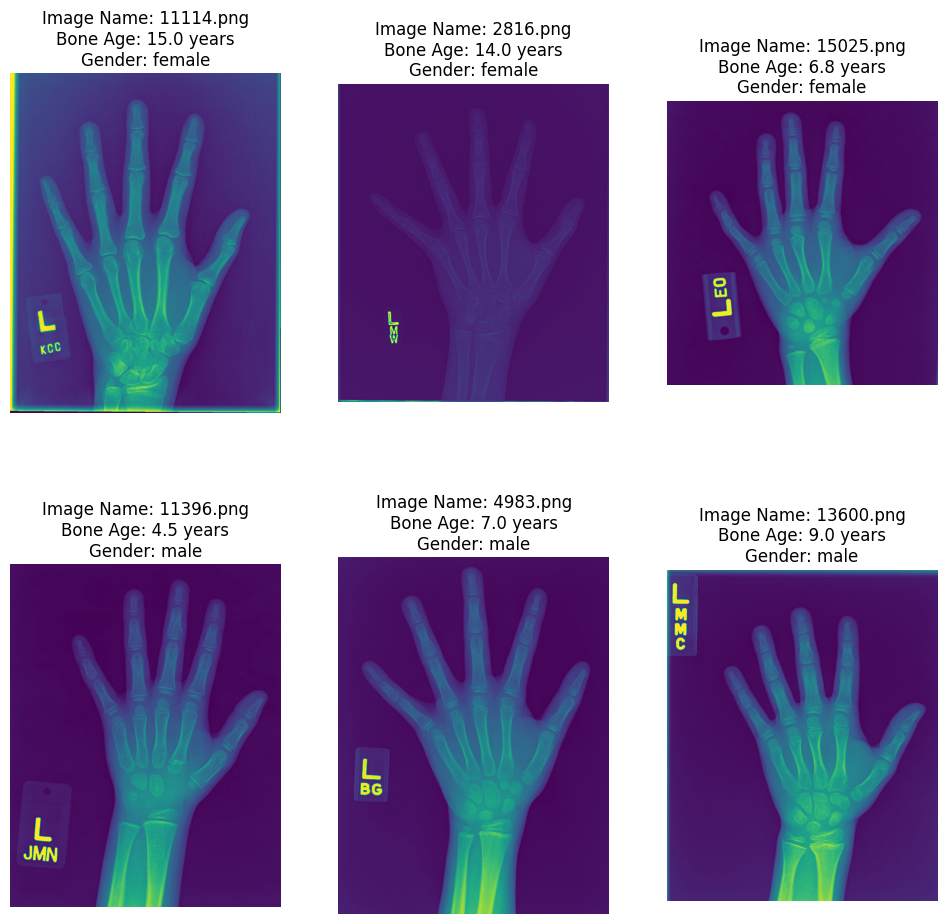

In [17]:
# Create a figure with subplots to display sample images
fig, axes = plt.subplots(2, 3, figsize=(10, 10))
fig.tight_layout()

# Iterate over a sample of image filenames, bone ages, and genders from the train_df DataFrame
for i, (filename, boneage, gender) in enumerate(train_df[['id', 'boneage', 'gender']].sample(6).values):
    # Read the image using mpimg.imread
    img = mpimg.imread('/content/drive/MyDrive/boneage Project/Bone Age Training Set/boneage-training-dataset/' + filename)

    # Determine the row and column for placing the image in the subplot grid
    row = i // 3
    col = i % 3

    # Display the image in the corresponding subplot
    axes[row, col].imshow(img)
    axes[row, col].set_title('Image Name: {}\nBone Age: {:.1f} years\nGender: {}'.format(filename, boneage / 12, gender))
    axes[row, col].axis('off')

# Show the figure with sample images
plt.show()

# **Preprocessing**

In [18]:
# Set the image size
img_size = 224

# Set the batch size for data generators
batch_size = 32

# Define the data generators
train_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)

 # Only rescale validation data
val_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)

# Generate train data from the DataFrame using flow_from_dataframe
train_generator = train_datagen.flow_from_dataframe(
    dataframe = df_train,
    directory='/content/drive/MyDrive/boneage Project/Bone Age Training Set/boneage-training-dataset',
    x_col='id',
    y_col='bone_age_z',
    batch_size=batch_size,
    seed=42,
    shuffle=True,
    class_mode='other',
    color_mode='rgb',
    target_size=(img_size, img_size)
)

# Generate validation data from the DataFrame using flow_from_dataframe
val_generator = val_datagen.flow_from_dataframe(
    dataframe=df_valid,
    directory='/content/drive/MyDrive/boneage Project/Bone Age Training Set/boneage-training-dataset',
    x_col='id',
    y_col='bone_age_z',
    batch_size=batch_size,
    seed=42,
    shuffle=True,
    class_mode='other',
    flip_vertical = True,
    color_mode='rgb',
    target_size=(img_size, img_size)
)

# Load and prepare test data
test_generator = val_datagen.flow_from_directory(
    directory='/content/drive/MyDrive/boneage Project/Bone Age Test Set',
    target_size=(img_size, img_size),
    shuffle = False,
    batch_size=1,
    color_mode='rgb',
    class_mode=None
)


Found 12632 validated image filenames.
Found 1404 validated image filenames.
Found 200 images belonging to 1 classes.


In [19]:
val_X, val_Y = next(val_datagen.flow_from_dataframe(
                            df_valid,
                            directory = '/content/drive/MyDrive/boneage Project/Bone Age Training Set/boneage-training-dataset',
                            x_col = 'id',
                            y_col = 'bone_age_z',
                            target_size = (img_size, img_size),
                            batch_size = 1404,
                            class_mode = 'other'
                            ))

Found 1404 validated image filenames.


# **Hyper Parameter Tuning**

In [ ]:
# Define the model building function
def build_model(hp):
    # Choose the hyperparameters
    architecture = hp.Choice('architecture', ['Xception', 'MobileNet', 'InceptionV3'])
    units = hp.Int('units', min_value=32, max_value=512, step=32)
    activation = hp.Choice('activation', ['relu', 'tanh'])
    dropout = hp.Boolean('dropout')
    lr = hp.Float('learning_rate', min_value=1e-5, max_value=1e-2, sampling='LOG')

    # Set the input shape based on the selected architecture
    if architecture == 'Xception':
        with tf.device('/device:GPU:0'):
            base_model = Xception(include_top=False, input_shape=(img_size, img_size, 3), weights='imagenet')
    elif architecture == 'MobileNet':
        with tf.device('/device:GPU:0'):
            base_model = MobileNet(include_top=False, input_shape=(img_size, img_size, 3), weights='imagenet')
    elif architecture == 'InceptionV3':
        with tf.device('/device:GPU:0'):
            base_model = InceptionV3(include_top=False, input_shape=(img_size, img_size, 3), weights='imagenet')

    model = Sequential()
    model.add(base_model)
    model.add(Dense(units, activation=activation))
    if dropout:
        model.add(Dropout(0.25))
    model.add(Dense(1))

    # Compile the model
    model.compile(optimizer=Adam(lr), loss='mse', metrics=['mae'])

    return model

# Define the tuner
tuner = kt.Hyperband(
    build_model,
    objective='val_loss',
    max_epochs=10,
    factor=3,
    directory='/content/drive/MyDrive/boneage Project/tuner',
    project_name='bone_age'
)

# Perform the search with the tuner
tuner.search(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=[EarlyStopping(monitor='val_loss', patience=3), TensorBoard(log_dir='/content/drive/MyDrive/boneage Project/logs')]
)

# Get the best hyperparameters for each architecture
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=3)

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Architecture', 'Units', 'Activation', 'Dropout', 'Learning Rate'])

# Iterate over the best hyperparameters and add them to the DataFrame
for i, hyperparameters in enumerate(best_hyperparameters):
    results_df.loc[i] = [
        hyperparameters['architecture'],
        hyperparameters['units'],
        hyperparameters['activation'],
        hyperparameters['dropout'],
        hyperparameters['learning_rate']
    ]

# Show the results DataFrame
results_df.head()


Trial 27 Complete [00h 47m 10s]

Best val_loss So Far: 1.052094578742981
Total elapsed time: 03h 58m 13s


Architecture  Units Activation  Dropout  Learning Rate
0  InceptionV3     64       relu    False       0.004280
1     Xception    512       tanh    False       0.000099
2     Xception     96       tanh    False       0.000315

# **Tensorboard**

In [21]:
# Function to calculate mean absolute error (MAE) in months

def mae_in_months(x_p, y_p):
    return mean_absolute_error((std_bone_age*x_p + mean_bone_age), (std_bone_age*y_p + mean_bone_age))

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

# Specify the directory path for TensorBoard logs
logs_dir = './logs'

# Start TensorBoard server and visualize logs in the specified directory
%tensorboard --logdir {logs_dir}

# **InceptionV3_relu_64**

In [ ]:
# Define the input shape
input_shape = (img_size, img_size, 3)

# Load the MobileNet model with pre-trained weights
base_model = InceptionV3(input_shape=input_shape, include_top=False, weights='imagenet')

# Set the base model to be trainable
base_model.trainable = True

# Create a sequential model
model_InceptionV3 = Sequential()

# Add the MobileNet base model as the first layer in the model
model_InceptionV3.add(base_model)

# Add a global max pooling layer to reduce spatial dimensions
model_InceptionV3.add(GlobalMaxPooling2D())

# Flatten the tensor output from the previous layer
model_InceptionV3.add(Flatten())

# Add a dense layer with 64 units and tanh activation
model_InceptionV3.add(Dense(64, activation='relu'))

# Add a dense layer with 1 unit and linear activation for regression
model_InceptionV3.add(Dense(1, activation='linear'))

# Compile the model with mean squared error (MSE) loss and Adam optimizer
model_InceptionV3.compile(loss='mse', optimizer='adam', metrics=[mae_in_months])

# Print a summary of the model architecture
model_InceptionV3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_max_pooling2d_1 (Glo  (None, 2048)             0         
 balMaxPooling2D)                                                
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 64)                131136    
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 21,933,985
Trainable params: 21,899,553
Non-trainable params: 34,432
_____________________________________

In [ ]:
# Early stopping callback to stop training if the validation loss does not improve
early_stopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=5,
                              verbose=0,
                              mode='auto')

# Model checkpoint callback to save the best model based on validation loss
mc = ModelCheckpoint('./content/drive/MyDrive/boneage Project/best_model-InceptionV3_relu.h5',
                     monitor='val_loss',
                     mode='min',
                     save_best_only=True)

# TensorBoard callback to log training progress for visualization
logdir = os.path.join(logs_dir, datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
tensorboard_callback = TensorBoard(logdir, histogram_freq=1)

# Learning rate value
lr = 0.004280

# List of callbacks to be used during model training
callbacks = [tensorboard_callback, early_stopping, mc]

# Fit the model to the training data
history = model_InceptionV3.fit(train_generator,
                             steps_per_epoch=395,
                             validation_data=val_generator,
                             validation_steps=1,
                             epochs=15,
                             callbacks=callbacks)


Epoch 1/15
395/395 [==============================] - 619s 2s/step - loss: 0.1686 - mae_in_months: 13.3309 - val_loss: 5.0906 - val_mae_in_months: 54.1694
Epoch 2/15
395/395 [==============================] - 583s 1s/step - loss: 0.1396 - mae_in_months: 12.0768 - val_loss: 0.1484 - val_mae_in_months: 12.2119
Epoch 3/15
395/395 [==============================] - 589s 1s/step - loss: 0.1194 - mae_in_months: 11.1242 - val_loss: 0.5533 - val_mae_in_months: 26.9966
Epoch 4/15
395/395 [==============================] - 590s 1s/step - loss: 0.1132 - mae_in_months: 10.8454 - val_loss: 0.1467 - val_mae_in_months: 12.6305
Epoch 5/15
395/395 [==============================] - 595s 2s/step - loss: 0.0965 - mae_in_months: 10.1160 - val_loss: 0.2075 - val_mae_in_months: 15.2671
Epoch 6/15
395/395 [==============================] - 589s 1s/step - loss: 0.0853 - mae_in_months: 9.4613 - val_loss: 0.1298 - val_mae_in_months: 12.1419
Epoch 7/15
395/395 [==============================] - 598s 2s/step - lo

44/44 [==============================] - 11s 223ms/step


<ipython-input-25-ab7d2dac9664>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax.set_title('Age: %fY\nPredicted Age: %fY' % (test_months[ind]/12.0, pred[ind]/12.0))


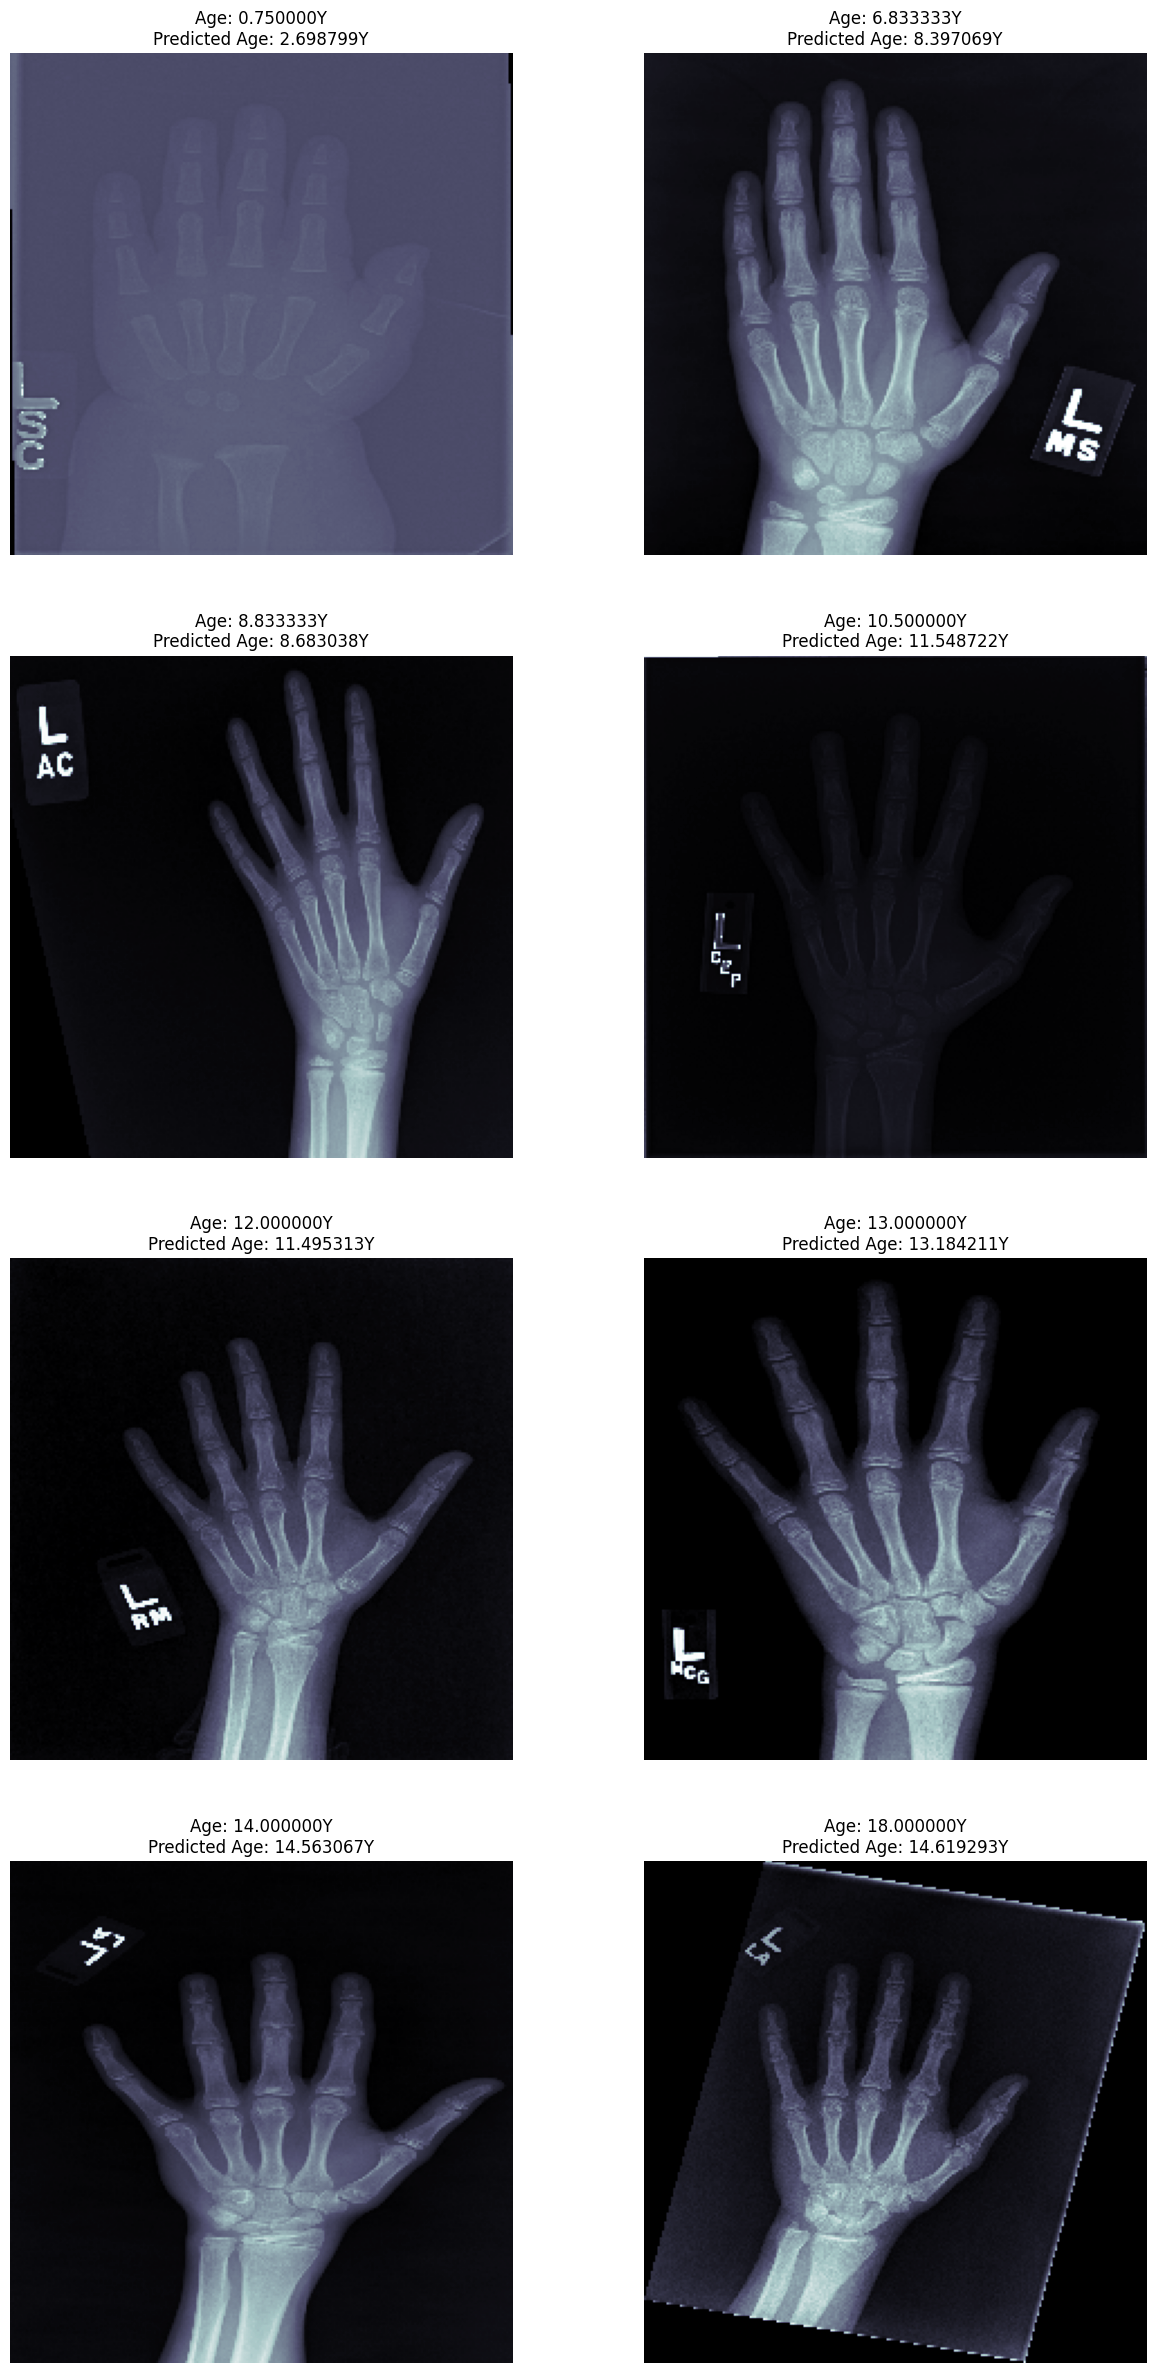

In [ ]:
# Load the weights of the trained model
model_InceptionV3.load_weights('/content/drive/MyDrive/boneage Project/best_model-InceptionV3_relu.h5')

# Predict the bone age for test data using the loaded model
pred = mean_bone_age + std_bone_age*(model_InceptionV3.predict(val_X, batch_size = 32, verbose = True))

# Convert the true bone age values to months
test_months = mean_bone_age + std_bone_age * val_Y

# Sort the test data indices based on true bone age values
ord_ind = np.argsort(val_Y)

# Select 8 evenly spaced indices from the sorted list
ord_ind = ord_ind[np.linspace(0, len(ord_ind)-1, 8).astype(int)] # take 8 evenly spaced ones

# Create a figure with subplots to display the predicted and true bone ages for selected images
fig, axs = plt.subplots(4, 2, figsize=(15, 30))

# Iterate over the selected indices and corresponding subplots
for (ind, ax) in zip(ord_ind, axs.flatten()):
    ax.imshow(val_X[ind, :,:,0], cmap = 'bone')
    ax.set_title('Age: %fY\nPredicted Age: %fY' % (test_months[ind]/12.0, pred[ind]/12.0))
    ax.axis('off')
fig.savefig('/content/drive/MyDrive/boneage Project/trained_image_predictions_best_model-InceptionV3_relu.png', dpi = 300)

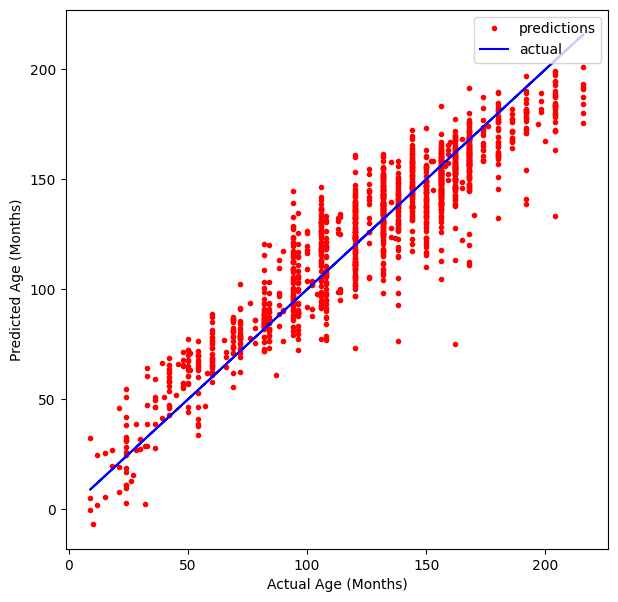

In [ ]:
# Create a figure and axis object with a size of 7x7 inches
fig, ax = plt.subplots(figsize = (7,7))

# Plot the predicted bone ages against the actual bone ages
ax.plot(test_months, pred, 'r.', label = 'predictions')
ax.plot(test_months, test_months, 'b-', label = 'actual')

# Add a legend to the plot indicating the meaning of the plotted elements
ax.legend(loc = 'upper right')

# Set labels for the x-axis and y-axis
ax.set_xlabel('Actual Age (Months)')
ax.set_ylabel('Predicted Age (Months)')

#Show Plot
fig.show()

In [ ]:
# Reset the test generator to its initial state
test_generator.reset()

# Print the information about the test generator
print(test_generator)

# Predict the bone ages using the model on the test generator
y_pred = model_InceptionV3.predict(test_generator)

# Flatten the predicted values into a 1D array
predicted = y_pred.flatten()

# Convert the predicted bone ages from normalized values to months
predicted_months = mean_bone_age + std_bone_age * (predicted)

# Get the filenames of the test samples from the test generator
filenames = test_generator.filenames

# Create a DataFrame to store the results with columns for filename and predictions
results = pd.DataFrame({"Filename": filenames, "Predictions": predicted_months})

# Save the results DataFrame to a CSV file named "results.csv"
results.to_csv("/content/drive/MyDrive/boneage Project/model_InceptionV3_relu_64_results.csv", index=False)

200/200 [==============================] - 7s 34ms/step


# **Xception_Tanh_512**

In [ ]:
# Define the input shape
input_shape = (img_size, img_size, 3)

# Load the MobileNet model with pre-trained weights
base_model = Xception(input_shape=input_shape, include_top=False, weights='imagenet')

# Set the base model to be trainable
base_model.trainable = True

# Create a sequential model
model_Xception = Sequential()

# Add the MobileNet base model as the first layer in the model
model_Xception.add(base_model)

# Add a global max pooling layer to reduce spatial dimensions
model_Xception.add(GlobalMaxPooling2D())

# Flatten the tensor output from the previous layer
model_Xception.add(Flatten())

# Add a dense layer with 512 units and tanh activation
model_Xception.add(Dense(512, activation='tanh'))

# Add a dense layer with 1 unit and linear activation for regression
model_Xception.add(Dense(1, activation='linear'))

# Compile the model with mean squared error (MSE) loss and Adam optimizer
model_Xception.compile(loss='mse', optimizer='adam', metrics=[mae_in_months])

# Print a summary of the model architecture
model_Xception.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 global_max_pooling2d_3 (Glo  (None, 2048)             0         
 balMaxPooling2D)                                                
                                                                 
 flatten_3 (Flatten)         (None, 2048)              0         
                                                                 
 dense_6 (Dense)             (None, 512)               1049088   
                                                                 
 dense_7 (Dense)             (None, 1)                 513       
                                                                 
Total params: 21,911,081
Trainable params: 21,856,553
Non-trainable params: 54,528
_____________________________________

In [ ]:
# Early stopping callback to stop training if the validation loss does not improve
early_stopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=5,
                              verbose=0,
                              mode='auto')

# Model checkpoint callback to save the best model based on validation loss
mc = ModelCheckpoint('/content/drive/MyDrive/boneage Project/best_model-Xception_tanh_512.h5',
                     monitor='val_loss',
                     mode='min',
                     save_best_only=True)

# TensorBoard callback to log training progress for visualization
logdir = os.path.join(logs_dir, datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
tensorboard_callback = TensorBoard(logdir, histogram_freq=1)

# Learning rate value
lr = 0.000099

# List of callbacks to be used during model training
callbacks = [tensorboard_callback, early_stopping, mc]

# Fit the model to the training data
history = model_Xception.fit(train_generator,
                             steps_per_epoch=395,
                             validation_data=val_generator,
                             validation_steps=1,
                             epochs=5,
                             callbacks=callbacks)


Epoch 1/5
395/395 [==============================] - 1190s 3s/step - loss: 0.1521 - mae_in_months: 12.5721 - val_loss: 0.2298 - val_mae_in_months: 15.2762
Epoch 2/5
395/395 [==============================] - 1146s 3s/step - loss: 0.1059 - mae_in_months: 10.5743 - val_loss: 0.1969 - val_mae_in_months: 14.3620
Epoch 3/5
395/395 [==============================] - 1145s 3s/step - loss: 0.0911 - mae_in_months: 9.7991 - val_loss: 0.0850 - val_mae_in_months: 10.1014
Epoch 4/5
395/395 [==============================] - 1141s 3s/step - loss: 0.0660 - mae_in_months: 8.2944 - val_loss: 0.2367 - val_mae_in_months: 14.8488
Epoch 5/5
395/395 [==============================] - 1145s 3s/step - loss: 0.0554 - mae_in_months: 7.6588 - val_loss: 0.1245 - val_mae_in_months: 10.0952


44/44 [==============================] - 22s 507ms/step


<ipython-input-36-86b0833d382a>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax.set_title('Age: %fY\nPredicted Age: %fY' % (test_months[ind]/12.0, pred[ind]/12.0))


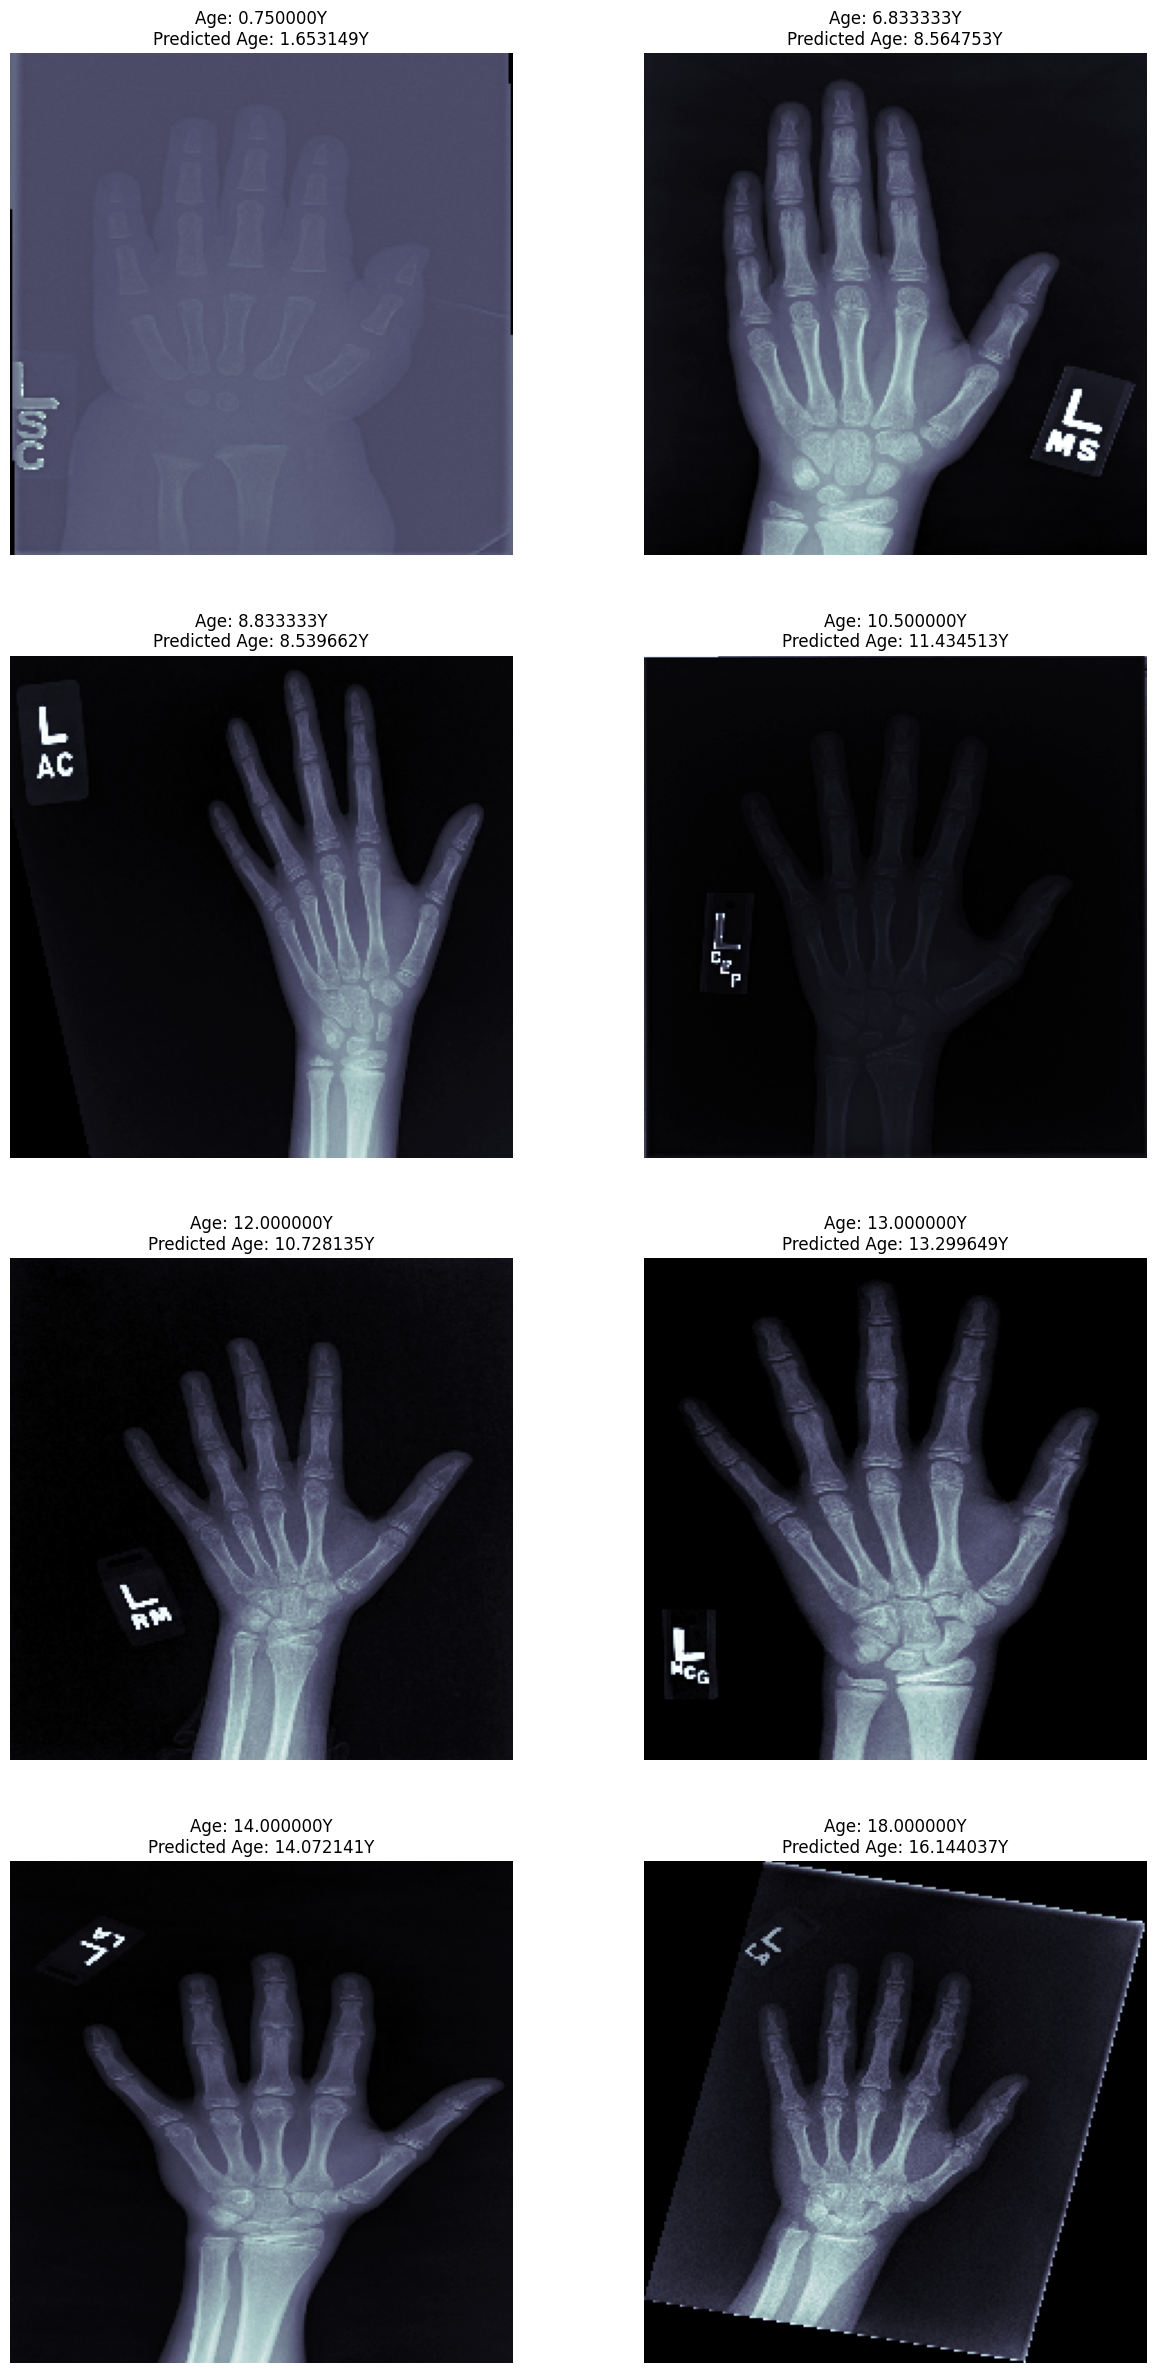

In [ ]:
# Load the weights of the trained model
model_Xception.load_weights('/content/drive/MyDrive/boneage Project/best_model-Xception_tanh_512.h5')

# Predict the bone age for test data using the loaded model
pred = mean_bone_age + std_bone_age*(model_Xception.predict(val_X, batch_size = 32, verbose = True))

# Convert the true bone age values to months
test_months = mean_bone_age + std_bone_age*(val_Y)

# Sort the test data indices based on true bone age values
ord_ind = np.argsort(val_Y)

# Select 2000 evenly spaced indices from the sorted list
ord_ind = ord_ind[np.linspace(0, len(ord_ind)-1, 8).astype(int)] # take 8 evenly spaced ones

# Create a figure with subplots to display the predicted and true bone ages for selected images
fig, axs = plt.subplots(4, 2, figsize = (15, 30))

# Iterate over the selected indices and corresponding subplots
for (ind, ax) in zip(ord_ind, axs.flatten()):
    ax.imshow(val_X[ind, :,:,0], cmap = 'bone')
    ax.set_title('Age: %fY\nPredicted Age: %fY' % (test_months[ind]/12.0, pred[ind]/12.0))
    ax.axis('off')

# Save the figure with predicted and true bone age values as an image
fig.savefig('trained_image_predictions_best_model_Xception_tanh_512.h5.png', dpi = 300)

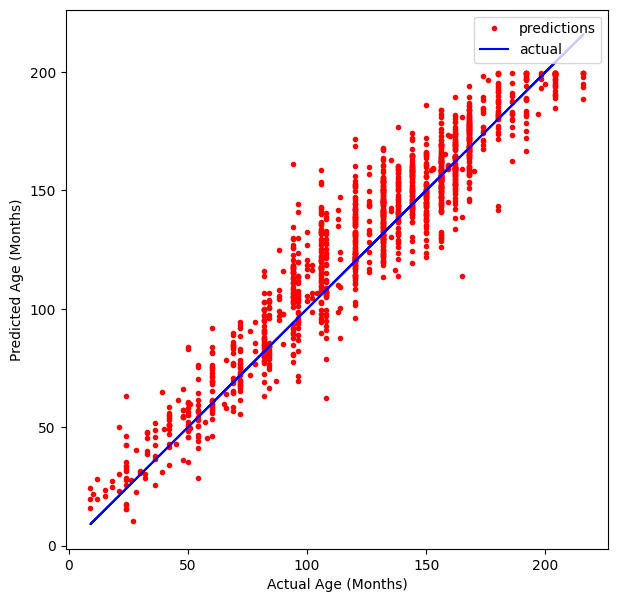

In [ ]:
# Create a figure and axis object with a size of 7x7 inches
fig, ax = plt.subplots(figsize = (7,7))

# Plot the predicted bone ages against the actual bone ages
ax.plot(test_months, pred, 'r.', label = 'predictions')
ax.plot(test_months, test_months, 'b-', label = 'actual')

# Add a legend to the plot indicating the meaning of the plotted elements
ax.legend(loc = 'upper right')

# Set labels for the x-axis and y-axis
ax.set_xlabel('Actual Age (Months)')
ax.set_ylabel('Predicted Age (Months)')

#Show Plot
fig.show()

In [ ]:
# Reset the test generator to its initial state
test_generator.reset()

# Print the information about the test generator
print(test_generator)

# Predict the bone ages using the model on the test generator
y_pred = model_Xception.predict(test_generator)

# Flatten the predicted values into a 1D array
predicted = y_pred.flatten()

# Convert the predicted bone ages from normalized values to months
predicted_months = mean_bone_age + std_bone_age * (predicted)

# Get the filenames of the test samples from the test generator
filenames = test_generator.filenames

# Create a DataFrame to store the results with columns for filename and predictions
results = pd.DataFrame({"Filename": filenames, "Predictions": predicted_months})

# Save the results DataFrame to a CSV file named "results.csv"
results.to_csv("/content/drive/MyDrive/boneage Project/model_Xception_Tanh_512_results.csv", index=False)

200/200 [==============================] - 47s 234ms/step


# **Xception_Tanh_96**

In [ ]:
# Define the input shape
input_shape = (img_size, img_size, 3)

# Load the MobileNet model with pre-trained weights
base_model = Xception(input_shape=input_shape, include_top=False, weights='imagenet')

# Set the base model to be trainable
base_model.trainable = True

# Create a sequential model
model_Xception = Sequential()

# Add the MobileNet base model as the first layer in the model
model_Xception.add(base_model)

# Add a global max pooling layer to reduce spatial dimensions
model_Xception.add(GlobalMaxPooling2D())

# Flatten the tensor output from the previous layer
model_Xception.add(Flatten())

# Add a dense layer with 64 units and tanh activation
model_Xception.add(Dense(96, activation='tanh'))

# Add a dense layer with 1 unit and linear activation for regression
model_Xception.add(Dense(1, activation='linear'))

# Compile the model with mean squared error (MSE) loss and Adam optimizer
model_Xception.compile(loss='mse', optimizer='adam', metrics=[mae_in_months])

# Print a summary of the model architecture
model_Xception.summary()

83683744/83683744 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 global_max_pooling2d (Globa  (None, 2048)             0         
 lMaxPooling2D)                                                  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 96)                196704    
                                                                 
 dense_1 (Dense)             (None, 1)                 97        
                                                                 
Total params: 21,058,281
Trainable params: 21,003,753
Non

In [ ]:
# Early stopping callback to stop training if the validation loss does not improve
early_stopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=5,
                              verbose=0,
                              mode='auto')

# Model checkpoint callback to save the best model based on validation loss
mc = ModelCheckpoint('./content/drive/MyDrive/boneage Project/best_model-Xception_Tanh_96.h5',
                     monitor='val_loss',
                     mode='min',
                     save_best_only=True)

# TensorBoard callback to log training progress for visualization
logdir = os.path.join(logs_dir, datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
tensorboard_callback = TensorBoard(logdir, histogram_freq=1)

# Learning rate value
lr = 0.000315

# List of callbacks to be used during model training
callbacks = [tensorboard_callback, early_stopping, mc]

# Fit the model to the training data
history = model_Xception.fit(train_generator,
                             steps_per_epoch=395,
                             validation_data=val_generator,
                             validation_steps=1,
                             epochs=10,
                             callbacks=callbacks)


Epoch 1/10
395/395 [==============================] - 5148s 13s/step - loss: 0.5269 - mae_in_months: 19.1397 - val_loss: 0.1018 - val_mae_in_months: 11.2746
Epoch 2/10
395/395 [==============================] - 400s 1s/step - loss: 0.1361 - mae_in_months: 11.9577 - val_loss: 0.1146 - val_mae_in_months: 10.1860
Epoch 3/10
395/395 [==============================] - 404s 1s/step - loss: 0.1099 - mae_in_months: 10.7188 - val_loss: 0.1269 - val_mae_in_months: 12.3742
Epoch 4/10
395/395 [==============================] - 420s 1s/step - loss: 0.0867 - mae_in_months: 9.6064 - val_loss: 0.1573 - val_mae_in_months: 12.9985
Epoch 5/10
395/395 [==============================] - 418s 1s/step - loss: 0.0797 - mae_in_months: 9.0681 - val_loss: 0.1057 - val_mae_in_months: 11.3681
Epoch 6/10
395/395 [==============================] - 425s 1s/step - loss: 0.0767 - mae_in_months: 8.7097 - val_loss: 0.1087 - val_mae_in_months: 10.6004


44/44 [==============================] - 4s 62ms/step


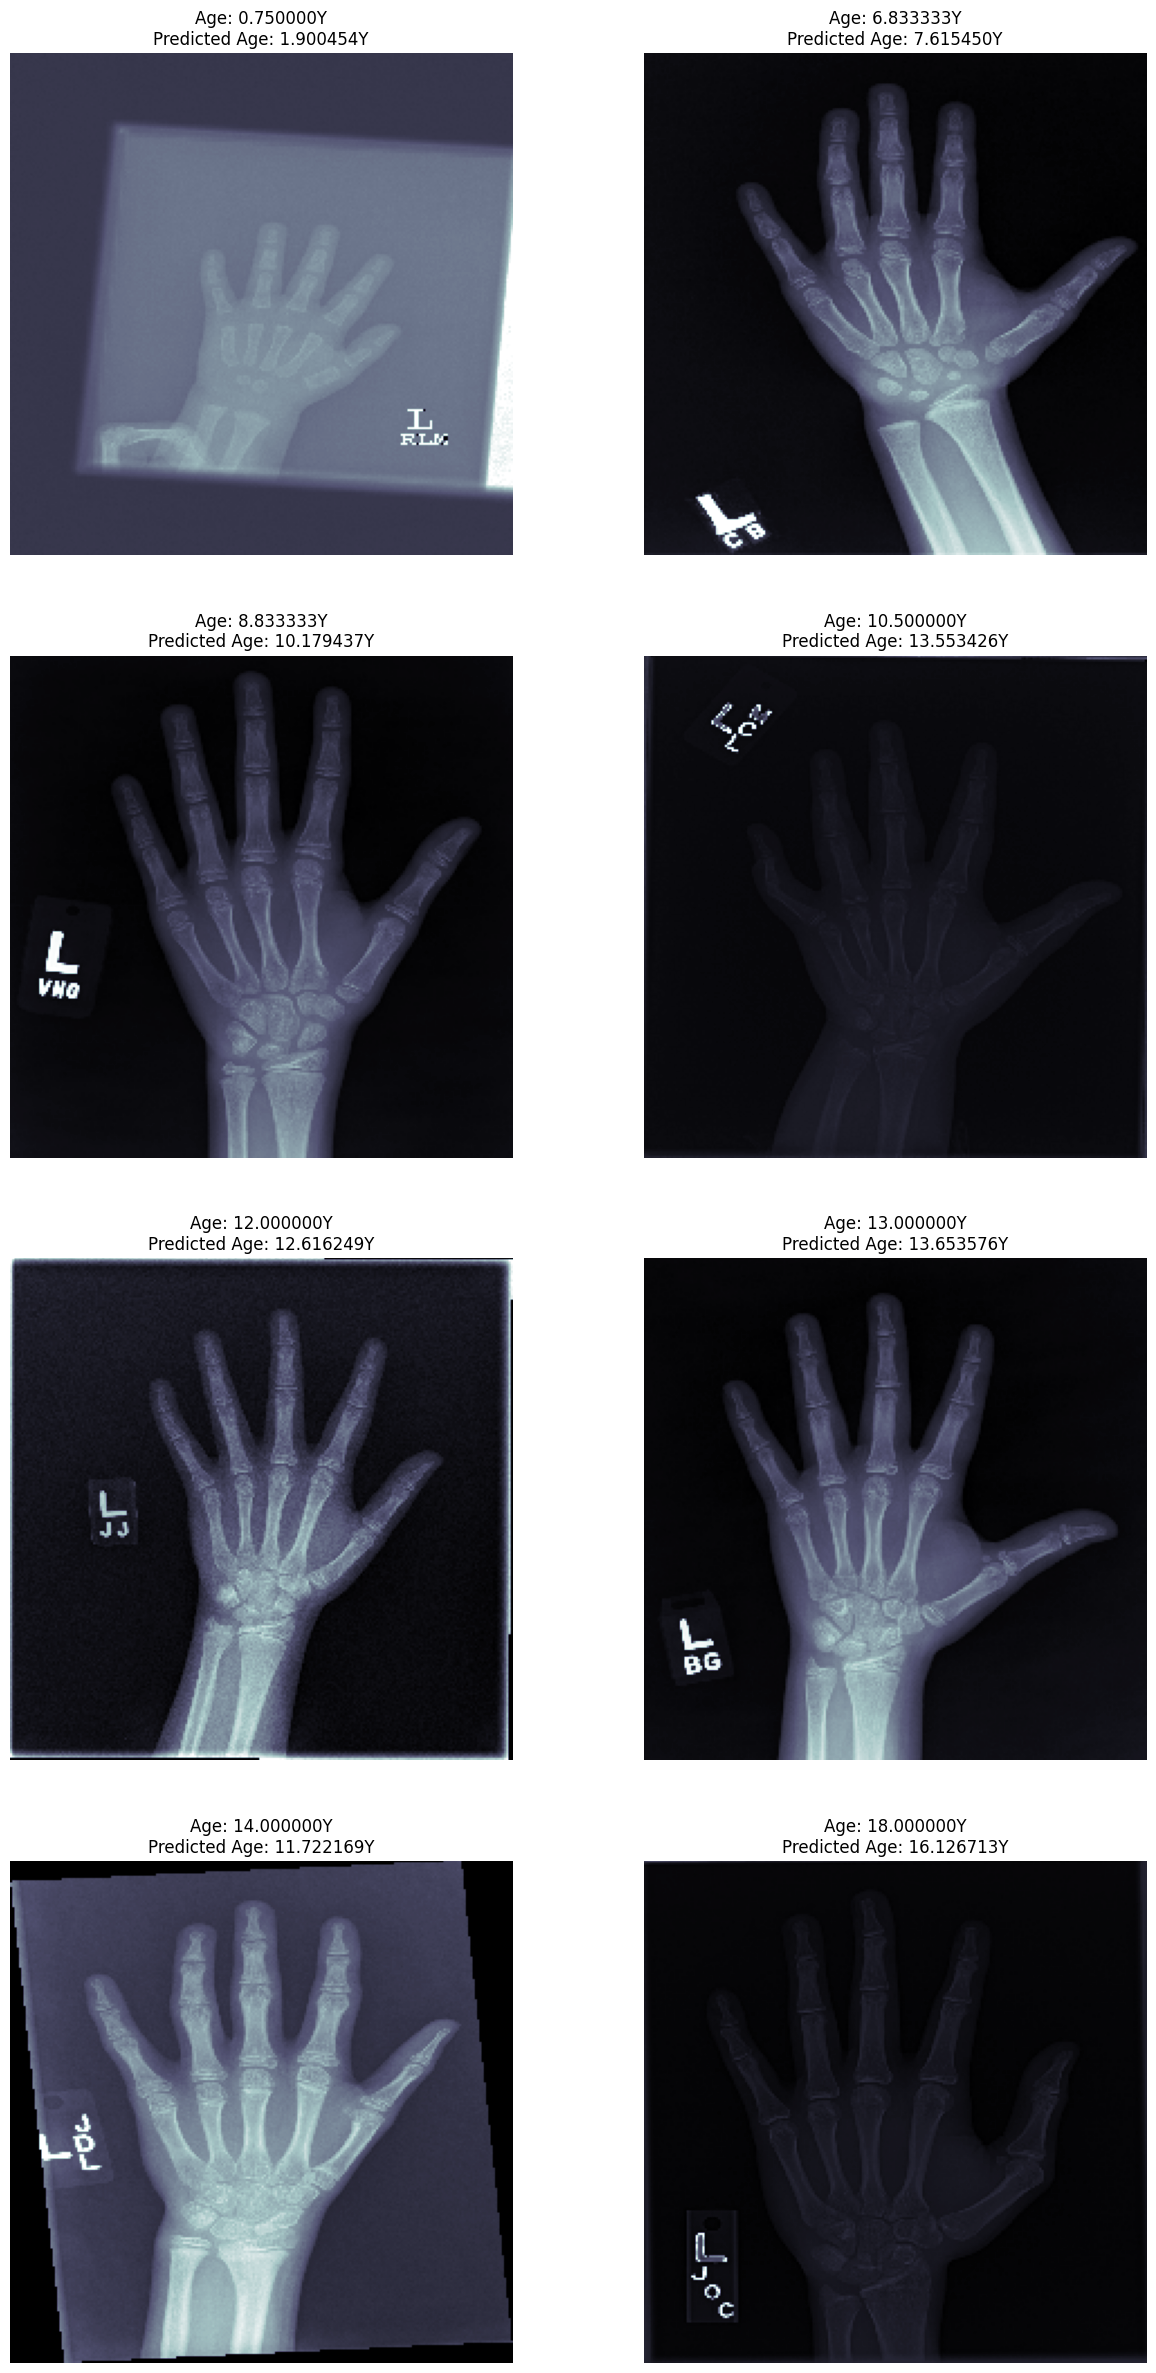

In [ ]:
# Load the weights of the trained model
model_Xception.load_weights('/content/drive/MyDrive/boneage Project/best_model-Xception_Tanh_96.h5')

# Predict the bone age for test data using the loaded model
pred = mean_bone_age + std_bone_age*(model_Xception.predict(val_X, batch_size = 32, verbose = True))

# Convert the true bone age values to months
test_months = mean_bone_age + std_bone_age*(val_Y)

# Sort the test data indices based on true bone age values
ord_ind = np.argsort(val_Y)

# Select 8 evenly spaced indices from the sorted list
ord_ind = ord_ind[np.linspace(0, len(ord_ind)-1, 8).astype(int)] # take 8 evenly spaced ones

# Create a figure with subplots to display the predicted and true bone ages for selected images
fig, axs = plt.subplots(4, 2, figsize = (15, 30))

# Iterate over the selected indices and corresponding subplots
for (ind, ax) in zip(ord_ind, axs.flatten()):
    ax.imshow(val_X[ind, :,:,0], cmap = 'bone')
    ax.set_title('Age: %fY\nPredicted Age: %fY' % (test_months[ind]/12.0, pred[ind]/12.0))
    ax.axis('off')

# Save the figure with predicted and true bone age values as an image
fig.savefig('trained_image_predictions_best_model-Xception_Tanh_96.png', dpi = 300)

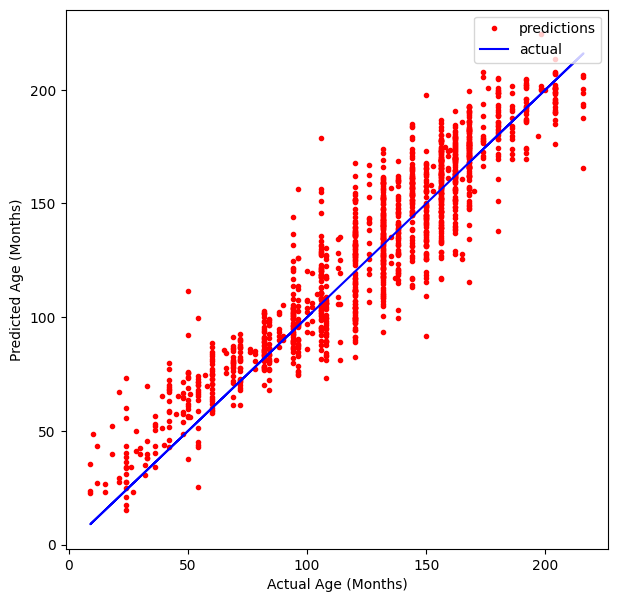

In [ ]:
# Create a figure and axis object with a size of 7x7 inches
fig, ax = plt.subplots(figsize = (7,7))

# Plot the predicted bone ages against the actual bone ages
ax.plot(test_months, pred, 'r.', label = 'predictions')
ax.plot(test_months, test_months, 'b-', label = 'actual')

# Add a legend to the plot indicating the meaning of the plotted elements
ax.legend(loc = 'upper right')

# Set labels for the x-axis and y-axis
ax.set_xlabel('Actual Age (Months)')
ax.set_ylabel('Predicted Age (Months)')

#Show Plot
fig.show()

In [ ]:
# Reset the test generator to its initial state
test_generator.reset()

# Print the information about the test generator
print(test_generator)

# Predict the bone ages using the model on the test generator
y_pred = model_Xception.predict(test_generator)

# Flatten the predicted values into a 1D array
predicted = y_pred.flatten()

# Convert the predicted bone ages from normalized values to months
predicted_months = mean_bone_age + std_bone_age * (predicted)

# Get the filenames of the test samples from the test generator
filenames = test_generator.filenames

# Create a DataFrame to store the results with columns for filename and predictions
results = pd.DataFrame({"Filename": filenames, "Predictions": predicted_months})

# Save the results DataFrame to a CSV file named "results.csv"
results.to_csv("/content/drive/MyDrive/boneage Project/model-Xception_Tanh_96_results.csv", index=False)

200/200 [==============================] - 76s 379ms/step


# **Evaluation**

In [ ]:
import pandas as pd

# Read the CSV files
Test_CSV = pd.read_csv("/content/drive/MyDrive/boneage Project/Bone Age Test Set/Bone age ground truth.csv")
Xception_Tanh_96_results = pd.read_csv("/content/drive/MyDrive/boneage Project/model-Xception_Tanh_96_results.csv")
InceptionV3_relu_64_results = pd.read_csv("/content/drive/MyDrive/boneage Project/model_InceptionV3_relu_64_results.csv")
Xception_Tanh_512_results = pd.read_csv("/content/drive/MyDrive/boneage Project/model_Xception_Tanh_512_results.csv")

# Modify the 'Filename' column in results dataframes
Xception_Tanh_96_results['Filename'] = Xception_Tanh_96_results['Filename'].str.replace('Test Set Images/', '', regex=False).str.replace('.png', '', regex=False)
InceptionV3_relu_64_results['Filename'] = InceptionV3_relu_64_results['Filename'].str.replace('Test Set Images/', '', regex=False).str.replace('.png', '', regex=False)
Xception_Tanh_512_results['Filename'] = Xception_Tanh_512_results['Filename'].str.replace('Test Set Images/', '', regex=False).str.replace('.png', '', regex=False)

# Modify the 'Case ID' column in Test_CSV dataframe
Test_CSV['Case ID'] = Test_CSV['Case ID'].astype(str)

# Merge the dataframes based on the 'Filename' column
merged_df = pd.merge(Xception_Tanh_96_results, Test_CSV, left_on='Filename', right_on='Case ID')
merged_df = pd.merge(merged_df, InceptionV3_relu_64_results, on='Filename')
merged_df = pd.merge(merged_df, Xception_Tanh_512_results, on='Filename')

# Rename the columns
merged_df.rename(columns={'Predictions_x': 'Xception_Tanh_96_Predictions',
                          'Predictions_y': 'InceptionV3_relu_64_Predictions',
                          'Predictions': 'Xception_Tanh_512_Predictions'},
                 inplace=True)

# Select the desired columns from the merged dataframe
desired_columns = ['Filename', 'Predictions_x', 'Predictions_y', 'Predictions', 'Ground truth bone age (months)']
merged_df = merged_df[desired_columns]

# Rename the columns
merged_df.rename(columns={'Predictions_x': 'Xception_Tanh_96_Predictions',
                          'Predictions_y': 'InceptionV3_relu_64_Predictions',
                          'Predictions': 'Xception_Tanh_512_Predictions'},
                 inplace=True)

merged_df.head()


In [60]:
# Calculate the absolute difference between each prediction and the ground truth bone age
merged_df['Xception_Tanh_96_Mae'] = abs(merged_df['Xception_Tanh_96_Predictions'] - merged_df['Ground truth bone age (months)'])
merged_df['InceptionV3_relu_64_Mae'] = abs(merged_df['InceptionV3_relu_64_Predictions'] - merged_df['Ground truth bone age (months)'])
merged_df['Xception_Tanh_512_Mae'] = abs(merged_df['Xception_Tanh_512_Predictions'] - merged_df['Ground truth bone age (months)'])

# Calculate the average accuracy for each model
xception_tanh_96_Mae = merged_df['Xception_Tanh_96_Mae'].mean()
inceptionv3_relu_64_Mae = merged_df['InceptionV3_relu_64_Mae'].mean()
xception_tanh_512_Mae = merged_df['Xception_Tanh_512_Mae'].mean()

# Create a DataFrame to display the results
result_df = pd.DataFrame({
    'Model': ['Xception_Tanh_96', 'InceptionV3_relu_64', 'Xception_Tanh_512'],
    'Mae': [xception_tanh_96_Mae, inceptionv3_relu_64_Mae, xception_tanh_512_Mae]
})

# Print the DataFrame
result_df.head()

Model        Mae
0     Xception_Tanh_96  12.482204
1  InceptionV3_relu_64  12.041059
2    Xception_Tanh_512   9.796242

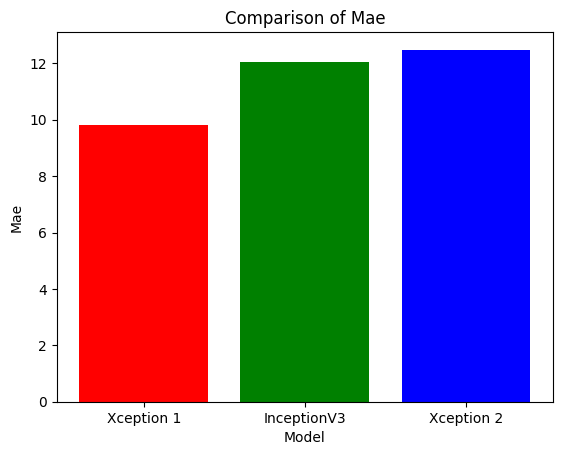

In [66]:
import matplotlib.pyplot as plt

# Sort the result_df by Mae in descending order
result_df_sorted = result_df.sort_values(by='Mae', ascending=True)

# Create a bar plot with custom colors
colors = ['red', 'green', 'blue']
plt.bar(result_df_sorted['Model'], result_df_sorted['Mae'], color=colors)

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Mae')
plt.title('Comparison of Mae')

# Set custom names for x-axis ticks
plt.xticks(result_df_sorted['Model'], ['Xception 1', 'InceptionV3', 'Xception 2'])

# Show the plot
plt.show()